> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

The **FBI Gun Data** dataset comes from th**e FBI's National Instant Criminal Background Check Syst**em. The **NICS** is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase 
The data has been supplemented with state level data**census.gov*** **FBI Gun Data** came ath two of dataset:

The first dataset that is **NICS data** [gun-data.csv](http://localhost:8888/edit/Database_Ncis_and_Census_data/gun_data.csv). Each columns of this represents the type of transaction submitted to the **National Instant Criminal Background Check System (NICS)**. In addition, each type of transaction is broken down by the type of firearm—***handgun***, ***long gun***, and other. The types of firearms are defined by the Bureau of Alcohol, Tobacco, Firearms and Explosives as follows:

- `month`: denotes month, year of data.
- `permit`: denotes the number of the background checks that permited.
- `permit_recheck`: denotes the number of the background checks that have need to rechecked.
- `handgun`: denotes the number of transactions with type of firearm-handgun.
- `long_gun`: denotes the number of transactions with type of firearm-long_gun.
- `other`: denotes the number of transactions with type that are neither handgun nor long_guns.
- `multiple`: denotes a backround check where more than one type of firearm is associated to a single background check.
- `admin`: denotes the adminitrative checks that are for other authorized uses of NICS.
- `pre-pawn_**`: denotes the background checks requested by offically-licensed FFL on prospective firearm transferees sekking to pledge or pawn a firearm as security for the payment of money, prior to actually pledging or pawning the firearm.
- `redemption_**`: denotes the background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.
- `returned_**`: denotes the background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited
- `rentals_**`: denotes the background checsks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.
- `private_sale_**`: denotes the background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.
- `return_to_seller_**`: denotes the background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL.

The second one that is [U.S.Census-Data](http://localhost:8888/edit/Database_Ncis_and_Census_data/US_Census_Data.csv). This dataset provide the set of information about some of the US population facts on  state level with includes:

- **Population estimates, Census**.
- **Ratio of Population at under 5, 65 and over** ... 
- **And other facts: Veterian, Races, non/employment ...**


### Question(s) for Analysis

1. What census data is most associated with high gun per capita?
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases? 

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling  
Data Wrangling includes two parts: Dataset investigation and Data cleaning for **U.S.Census-Data** and **NICS data (gun-data)**.

### I. Data structure investigation.
First we will have some step to study the working with datasets.

In [4]:
# Load data and print out a few lines. What is the size of your dataframe? 
df_census = pd.read_csv("Database_Ncis_and_Census_data/US_Census_Data.csv")
df_gun = pd.read_csv("Database_Ncis_and_Census_data/gun_data.csv")
print("df_census.shape: {} - df_gun.shape: {}".format(df_census.shape, df_gun.shape))

df_census.shape: (85, 52) - df_gun.shape: (12485, 27)


In [5]:
df_census.head(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


In [6]:
df_gun.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [7]:
# show Cencus data information 
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [8]:
# show NICS data information
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [9]:
# Census data, find all columns with NaN values
print(df_census.columns[df_census.isna().any()])
print("Sum of Duplicated: {}".format(sum(df_census.duplicated())))
df_census[df_census.isna()]

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')
Sum of Duplicated: 3


,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# NICS data, find all columns with NaN values
print(df_gun.columns[df_gun.isna().any()])
print("Sum of Duplicated: {}".format(sum(df_gun.duplicated())))
df_gun[df_gun.isna()]

Index(['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'admin',
       'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other',
       'redemption_handgun', 'redemption_long_gun', 'redemption_other',
       'returned_handgun', 'returned_long_gun', 'returned_other',
       'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'],
      dtype='object')
Sum of Duplicated: 0


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### II. Data Cleaning

After done analysis, we will do some step to clean up data.

#### I. U.S.Census-Data :
   1. Remove **Description areas**.
   2. Drop **Fact** column.
   3. Tranpose **Fact** index and columns. Rename **Fact** column to **state** then set **state** as index. 
   4. Convert columns with **populations** data to int type.
   5. Convert columns with **ratio** data to float type.

In [11]:
# remove "description areas" from Census-Data
df_census_clean = df_census.dropna(subset=['Alabama', 'Wyoming'])
df_census_clean.tail(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [12]:
# drop the unused column: "Fact Note"
df_census_clean = df_census_clean.drop(columns=['Fact Note'])
df_census_clean.head(2)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [13]:
# set index to "Fact" to create transpose from
df_census_clean.set_index('Fact', inplace=True)

# transpose census dataframe
df_census_clean = df_census_clean.T.reset_index()
df_census_clean.columns.name = None
df_census_clean.head(2)

,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""


In [14]:
# rename "Fact" column to "state"
df_census_clean.rename(columns={'index': 'state'}, inplace=True)
df_census_clean.head(1)

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""


In [15]:
# convert census population columns to int
for col in [column for column in df_census_clean.columns if ("Population" in  column) and ("percent" not in column) and (" per " not in column)]:
    df_census_clean[col] = df_census_clean[col].str.replace(',', '').astype(np.uint32)

In [16]:
# convert census ratio columns to float
for col in [column for column in df_census_clean.columns if ("percent" in column)]:
    df_census_clean[col] = df_census_clean[col].str.replace('%', '')
    notes=['Z', 'F', 'FN', '0N']
    for note in notes:
        df_census_clean[col] = df_census_clean[col].str.replace(note, '0')
        
    df_census_clean[col] = df_census_clean[col].astype(np.float16)

In [17]:
df_census_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   state                                                                                   50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     uint32 
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     uint32 
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float16
 4   Population, Census, April 1, 2010                                                       50 non-null     uint32 
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                   

In [18]:
# Check duplicated data
sum(df_census_clean.duplicated())

0

In [19]:
# clean_census_data() function definition
def clean_census_data():
    # remove Description areas from Census data then reset index
    df_census_clean = df_census.dropna(subset=['Alabama', 'Wyoming'])
    
    # drop the "Fact" column
    df_census_clean = df_census_clean.drop(columns=['Fact Note'])
    
    # set index to "Fact" to create transpose from
    df_census_clean.set_index('Fact', inplace=True)

    # transpose census dataframe
    df_census_clean = df_census_clean.T.reset_index()
    df_census_clean.columns.name = None
    
    # rename "Fact" column to "state"
    df_census_clean.rename(columns={'index': 'state'}, inplace=True)
    
    # convert census population coulumn to integer
    for col in [column for column in df_census_clean.columns if ("Population" in  column) and ("percent" not in column) and (" per " not in column)]:
        df_census_clean[col] = df_census_clean[col].str.replace(',', '').astype(np.uint32)
        
    # convert census ratio change columns float
    for col in [column for column in df_census_clean.columns if ("percent" in column)]:
        df_census_clean[col] = df_census_clean[col].str.replace('%', '')
        notes=['Z', 'F', 'FN', '0N']
        for note in notes:
            df_census_clean[col] = df_census_clean[col].str.replace(note, '0')

        df_census_clean[col] = df_census_clean[col].astype(np.float16)

    return df_census_clean

#### II. NICS Data :
   1. Fill all **NaN** values with zero number.
   2. Attract **Month**, **Year** as int type from Month column, then drop Month column.
   3. Converting the **floating type** columns to **int type** to reduce size of dataset.

In [20]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Fill NaN with Zero number
df_gun_clean = df_gun.fillna(0)
df_gun_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             12485 non-null  float64
 4   handgun                    12485 non-null  float64
 5   long_gun                   12485 non-null  float64
 6   other                      12485 non-null  float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12485 non-null  float64
 9   prepawn_handgun            12485 non-null  float64
 10  prepawn_long_gun           12485 non-null  float64
 11  prepawn_other              12485 non-null  float64
 12  redemption_handgun         12485 non-null  float64
 13  redemption_long_gun        12485 non-null  flo

In [21]:
# Attract **month_int**, **year_int** as int type from Month column, then drop Month column.
df_gun_clean["year_int"] = df_gun_clean["month"].apply(lambda x: np.uint16(x.split("-")[0]))
df_gun_clean["month_int"] = df_gun_clean["month"].apply(lambda x: np.uint8(x.split("-")[1]))

# Drop **month** column from dataset
df_gun_clean = df_gun_clean.drop(columns=["month"])
df_gun_clean.head(2)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year_int,month_int
0,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,9
1,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,9


In [22]:
# Get list of float type columns
float_cols = df_gun_clean.select_dtypes(include=[np.float64]).columns.values
# Convert float type columns to uint32
df_gun_clean[float_cols] = df_gun_clean[float_cols].astype(np.int64)
df_gun_clean.head(2)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year_int,month_int
0,Alabama,16717,0,5734,6320,221,317,0,15,21,...,0,9,16,3,0,0,3,32019,2017,9
1,Alaska,209,2,2320,2930,219,160,0,5,2,...,0,17,24,1,0,0,0,6303,2017,9


In [23]:
# show information of cleaned dataframe
df_gun_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      12485 non-null  object
 1   permit                     12485 non-null  int64 
 2   permit_recheck             12485 non-null  int64 
 3   handgun                    12485 non-null  int64 
 4   long_gun                   12485 non-null  int64 
 5   other                      12485 non-null  int64 
 6   multiple                   12485 non-null  int64 
 7   admin                      12485 non-null  int64 
 8   prepawn_handgun            12485 non-null  int64 
 9   prepawn_long_gun           12485 non-null  int64 
 10  prepawn_other              12485 non-null  int64 
 11  redemption_handgun         12485 non-null  int64 
 12  redemption_long_gun        12485 non-null  int64 
 13  redemption_other           12485 non-null  int64 
 14  return

In [24]:
# clean_nics_data() function defination
def clean_nics_data():
    df_gun_tmp = None
    # fill NaN with Zero number
    
    df_gun_tmp = df_gun.fillna(0)

    # attract "month_int", "year_int** as int type from Month column, then drop Month column.
    df_gun_tmp["year_int"] = df_gun_tmp["month"].apply(lambda x: np.uint16(x.split("-")[0]))
    df_gun_tmp["month_int"] = df_gun_tmp["month"].apply(lambda x: np.uint8(x.split("-")[1]))
    
    # drop "month" column from dataset
    df_gun_tmp = df_gun_tmp.drop(columns=["month"])
    
    # get list of float type columns
    float_cols = df_gun_tmp.select_dtypes(include=[np.float64]).columns.values
    # convert float type columns to uint32
    df_gun_tmp[float_cols] = df_gun_tmp[float_cols].astype(np.uint32)

    return df_gun_tmp

<a id='eda'></a>
## Exploratory Data Analysis

##### - Most variables just have one data point per state (2016), so that we will make a analysis with associate between Census and NICS data for 2016.

### Research Question 1: What census data is most associated with high gun per capita?

In [25]:
# get cleaned census data
df_census_clean = clean_census_data()
# get clean nics data
df_gun_clean = clean_nics_data()

In [26]:
# get data facts
data_facts = [column for column in df_census_clean.columns if ('state' not in column and 'Population ' not in column and '2010' not in column and 'percent' in column and '2016' in column)]

data_facts

['Persons under 5 years, percent, July 1, 2016,  (V2016)',
 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
 'Female persons, percent,  July 1, 2016,  (V2016)',
 'White alone, percent, July 1, 2016,  (V2016)',
 'Black or African American alone, percent, July 1, 2016,  (V2016)',
 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
 'Asian alone, percent, July 1, 2016,  (V2016)',
 'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
 'Two or More Races, percent, July 1, 2016,  (V2016)',
 'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
 'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)']

In [27]:
# get only census data for 2016
df_census_2016 = df_census_clean[['state','Population estimates, July 1, 2016,  (V2016)'] + data_facts]
df_census_2016 = df_census_2016.rename(columns={'Population estimates, July 1, 2016,  (V2016)' : 'population_2016'})

df_census_2016.head(2)

,state,population_2016,"Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)"
0,Alabama,4863300,6.000000,22.593750,16.093750,51.59375,69.3125,26.796875,0.700195,1.400391,0.099976,1.599609,4.199219,65.8125
1,Alaska,741894,7.300781,25.203125,10.398438,47.68750,66.1250,3.800781,15.203125,6.300781,1.299805,7.300781,7.000000,61.1875


In [28]:
# extract subset gun data for 2016
df_gun_2016 = df_gun_clean[df_gun_clean['year_int'] == 2016][['state', 'totals']]
df_gun_2016_total = df_gun_2016.groupby('state')['totals'].sum().reset_index()

df_gun_2016_total.head(2)

,state,totals
0,Alabama,616947
1,Alaska,87647


In [29]:
# merge Gun_Total_16 and Cencus data
df_question_1 = df_census_2016.merge(df_gun_2016_total, on='state', how='inner')

df_question_1.head(2)

,state,population_2016,"Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)",totals
0,Alabama,4863300,6.000000,22.593750,16.093750,51.59375,69.3125,26.796875,0.700195,1.400391,0.099976,1.599609,4.199219,65.8125,616947
1,Alaska,741894,7.300781,25.203125,10.398438,47.68750,66.1250,3.800781,15.203125,6.300781,1.299805,7.300781,7.000000,61.1875,87647


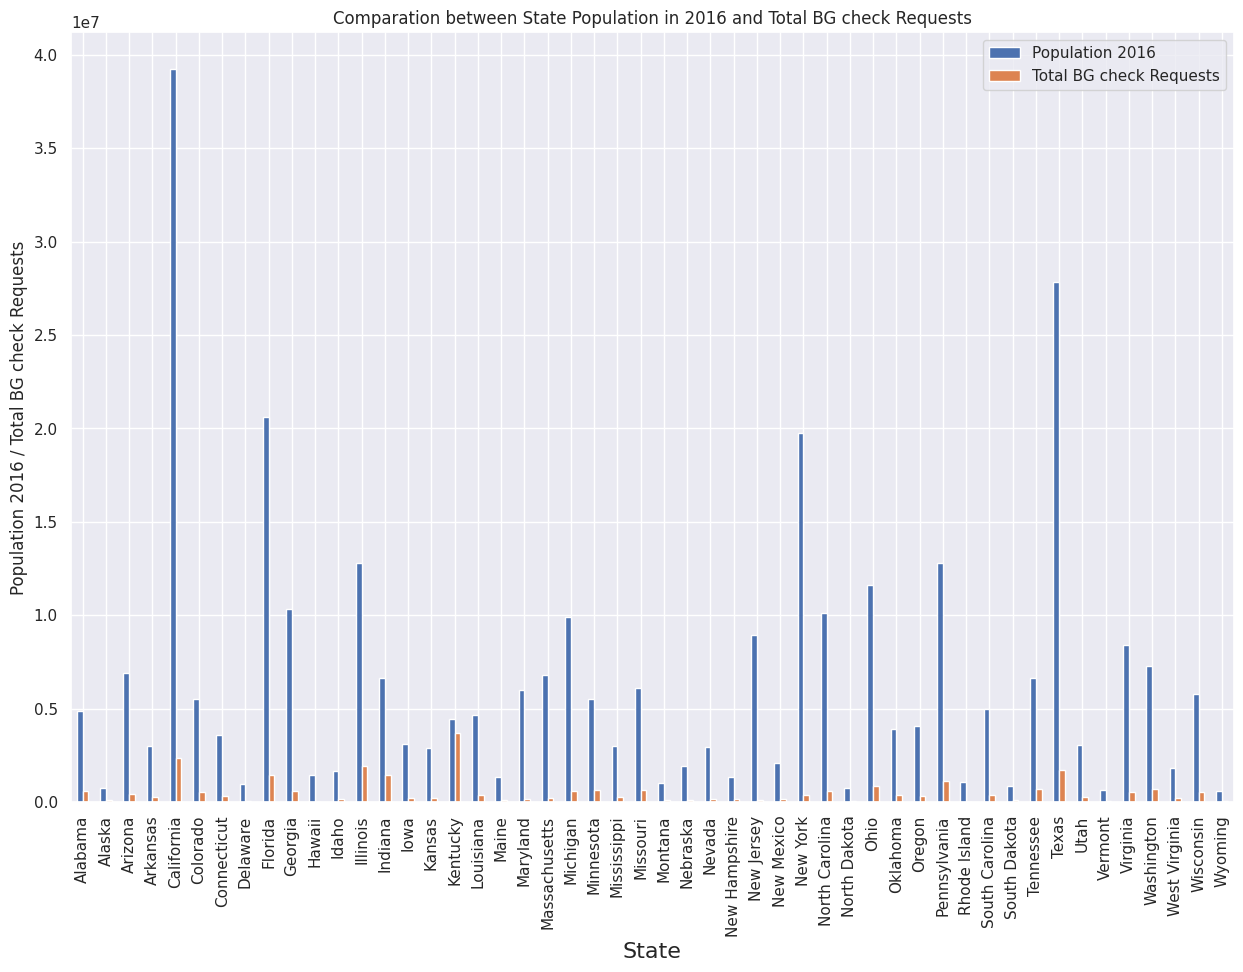

In [30]:
# plot Analysic
sns.set()

df_question_1.plot(x='state', y=['population_2016', 'totals'], kind='bar', figsize=(15, 10))
plt.xlabel("State", fontsize=16)
plt.ylabel("Population 2016 / Total BG check Requests", fontsize=12)
plt.title("Comparation between State Population in 2016 and Total BG check Requests")
plt.legend(['Population 2016', 'Total BG check Requests'])

**Comparation between State Population in 2016 and Total BG check Requests** show the first view about the associated between population and Total BG check Requests for 2016. The chart refect that **population** was not affacted so much to number of **BG check Requests**

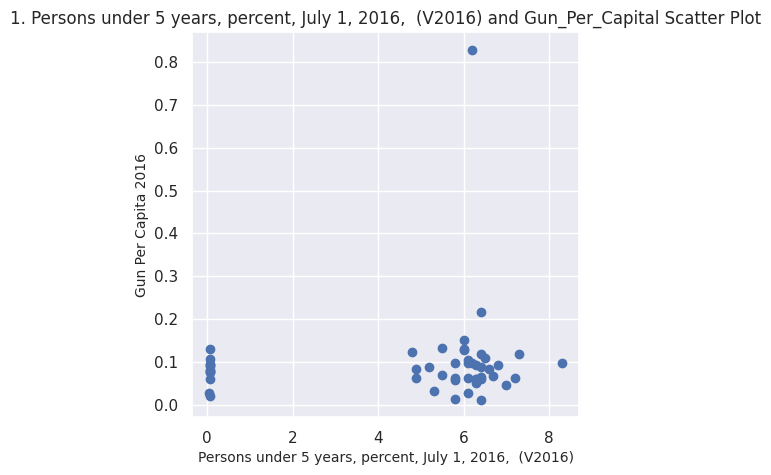

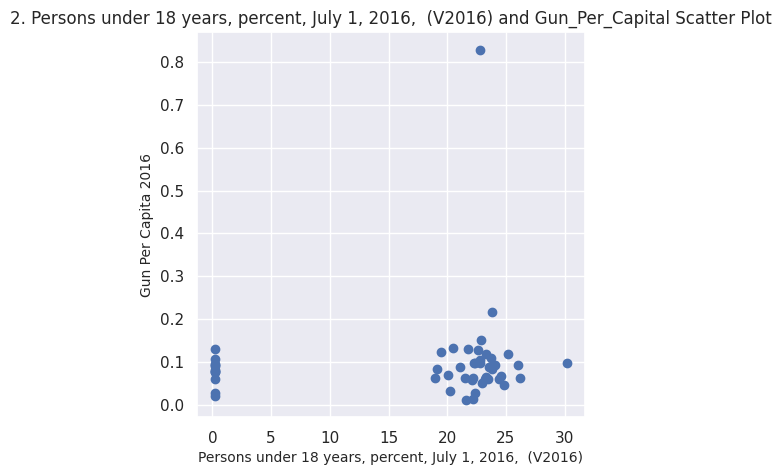

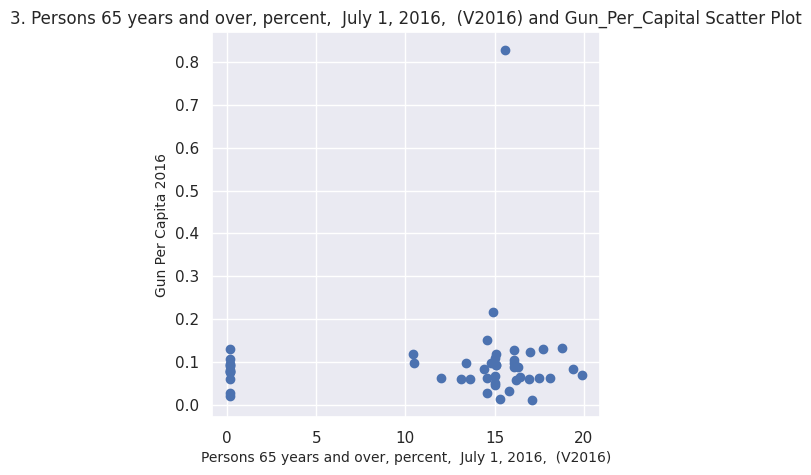

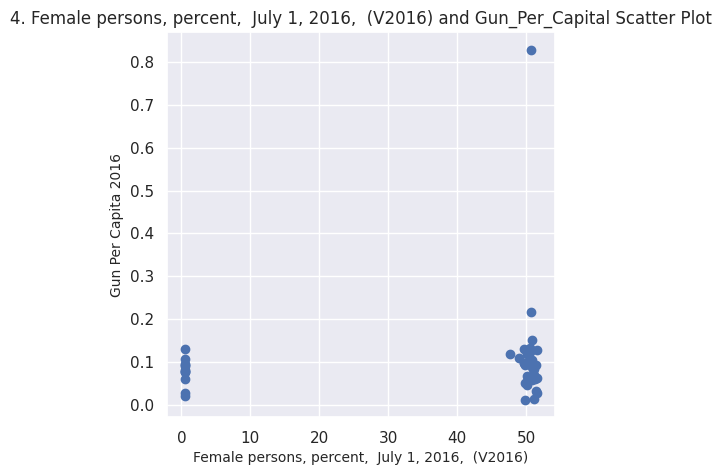

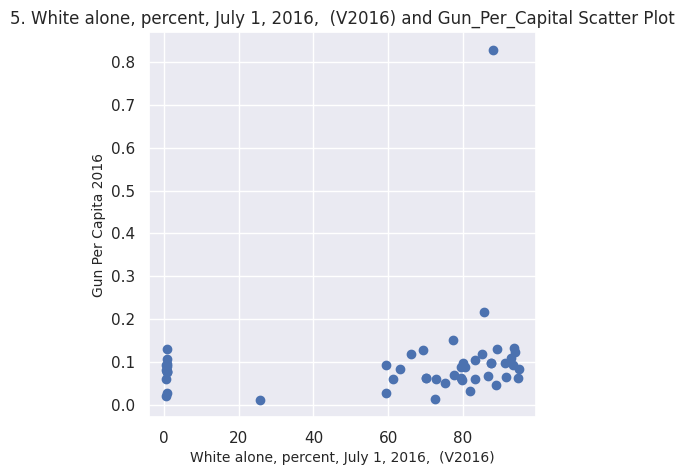

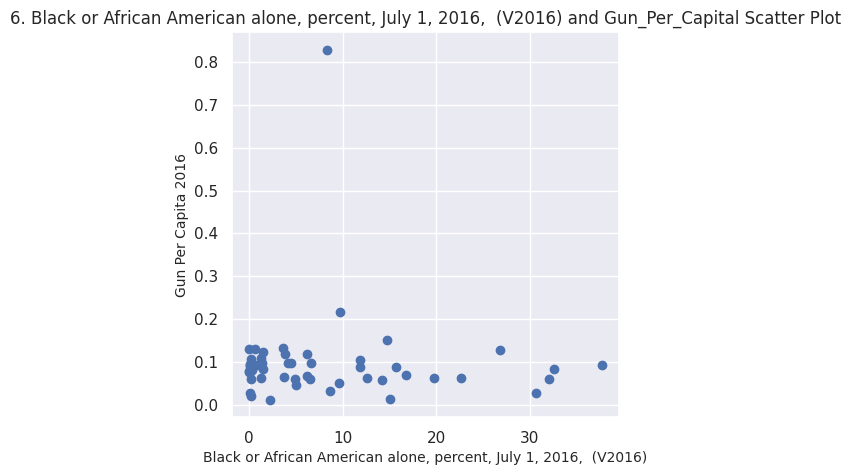

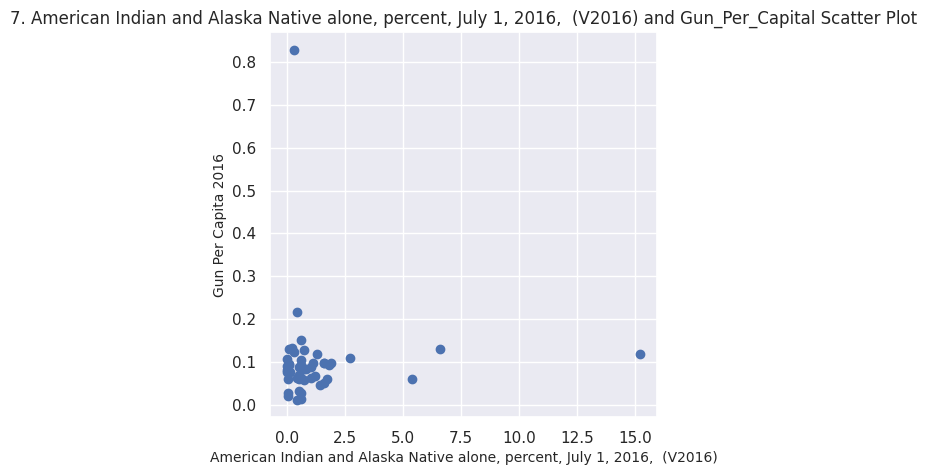

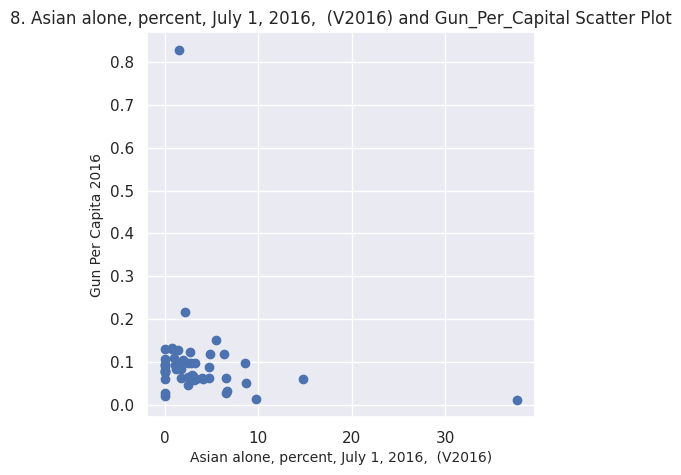

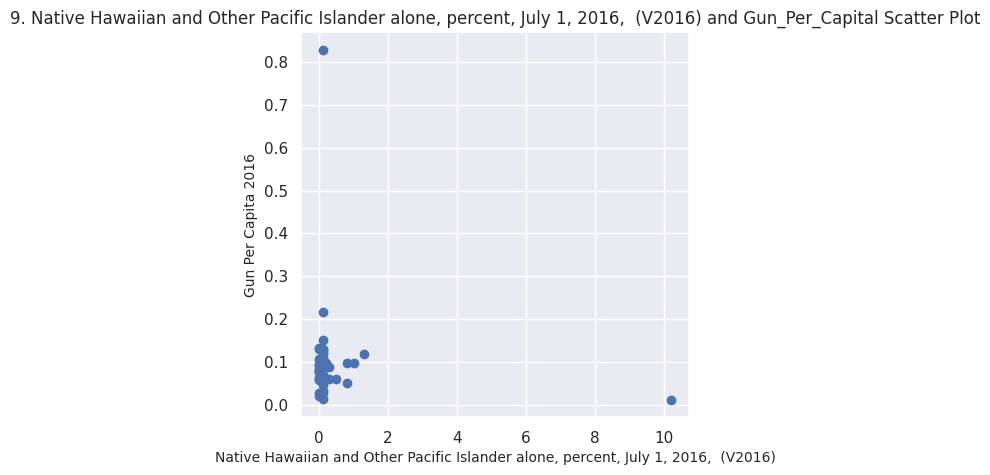

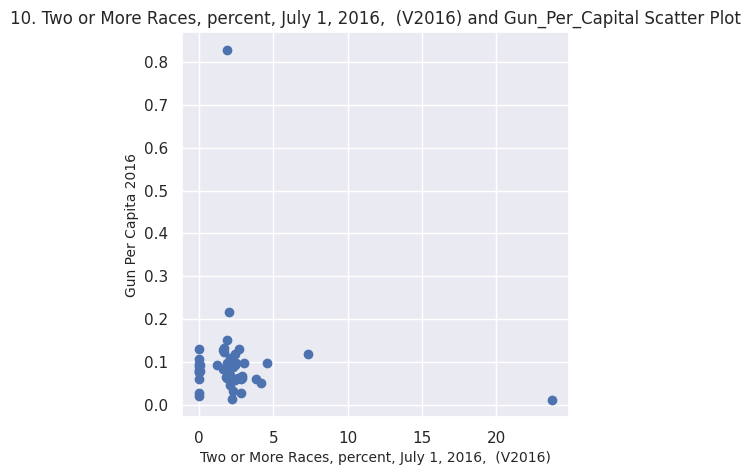

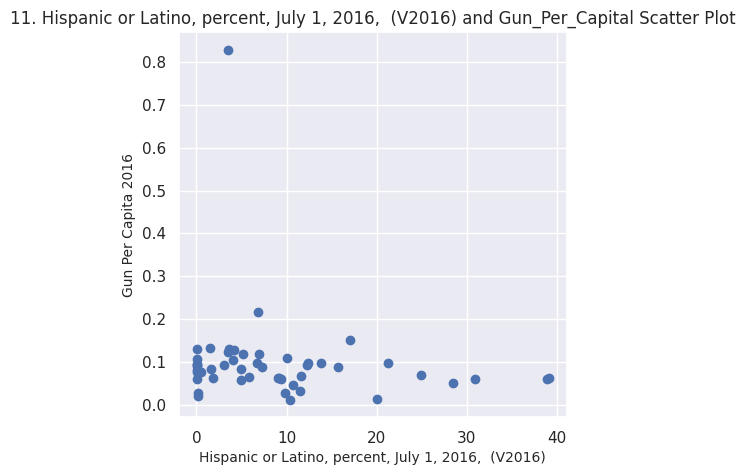

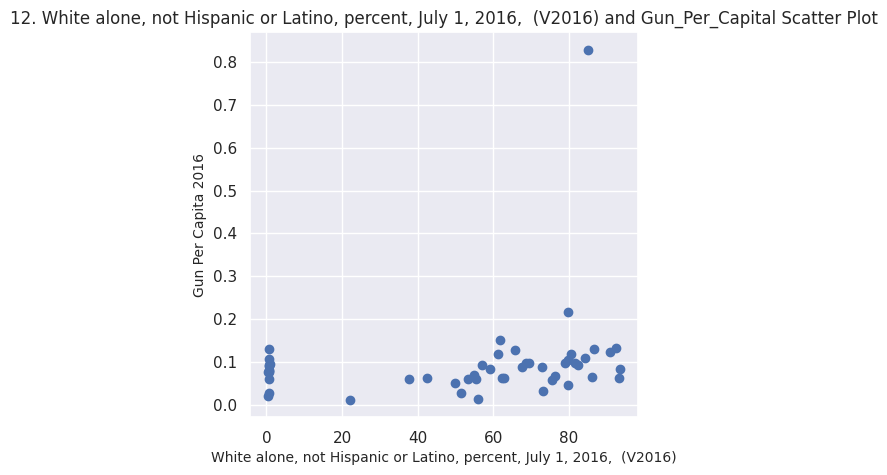

In [31]:
# calculate Gun Per Capita 2016
df_question_1['gun_per_capita'] = df_question_1['totals']/df_question_1['population_2016']

for index, data_fact in enumerate(data_facts):
    #df_question_1.plot(x='state', y=[data_fact, 'gun_per_capita'], kind='bar', figsize=(15, 10))
    plt.figure(figsize=(5,5))
    plt.scatter(df_question_1[data_fact], df_question_1['gun_per_capita'], label = data_fact)
    plt.title("{}. {} and Gun_Per_Capital Scatter Plot".format(index+1, data_fact), fontsize=12)     
    plt.ylabel("Gun Per Capita 2016", fontsize= 10)
    plt.xlabel(data_fact, fontsize=10)
    plt.grid(True)
    plt.show()

**The set of scatter plot** have been explained the associated between other **population facts** and **high gun per capita**.They have weak associations excludes **"White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)"** fact with positive association.

### Research Question 3 : Which Top 10 states have had the highest in gun registrations?

In [32]:
# get top 10 highest gun registrations 
df_question_2 = df_question_1.nlargest(10, 'totals')
df_question_2

,state,population_2016,"Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)",totals,gun_per_capita
16,Kentucky,4436974,6.199219,22.796875,15.601562,50.687500,88.000000,8.296875,0.300049,1.500000,0.099976,1.900391,3.500000,85.000000,3676847,0.828683
4,California,39250017,6.300781,23.203125,13.601562,50.312500,72.687500,6.500000,1.700195,14.796875,0.500000,3.800781,38.906250,37.687500,2377167,0.060565
12,Illinois,12801539,6.000000,22.906250,14.601562,50.906250,77.187500,14.703125,0.600098,5.500000,0.099976,1.900391,17.000000,61.687500,1924070,0.150300
42,Texas,27862596,7.199219,26.203125,12.000000,50.406250,79.375000,12.601562,1.000000,4.800781,0.099976,1.900391,39.093750,42.593750,1721726,0.061793
13,Indiana,6633053,6.398438,23.796875,14.898438,50.687500,85.625000,9.703125,0.399902,2.199219,0.099976,2.000000,6.800781,79.625000,1436725,0.216601
8,Florida,20612439,5.500000,20.093750,19.906250,51.093750,77.625000,16.796875,0.500000,2.900391,0.099976,2.099609,24.906250,54.906250,1435340,0.069635
37,Pennsylvania,12784227,0.056000,0.208984,0.173950,0.509766,0.824219,0.117981,0.004002,0.035004,0.001000,0.018997,0.070007,0.770020,1143220,0.089424
34,Ohio,11614373,0.059998,0.224976,0.161987,0.509766,0.825195,0.128052,0.003000,0.022003,0.001000,0.022003,0.036987,0.794922,875724,0.075400
41,Tennessee,6651194,0.061005,0.225952,0.156982,0.512207,0.787109,0.171021,0.004002,0.018005,0.001000,0.018997,0.052002,0.742188,714774,0.107466
46,Washington,7288000,6.199219,22.406250,14.796875,50.000000,80.000000,4.101562,1.900391,8.601562,0.799805,4.601562,12.398438,69.500000,713996,0.097969


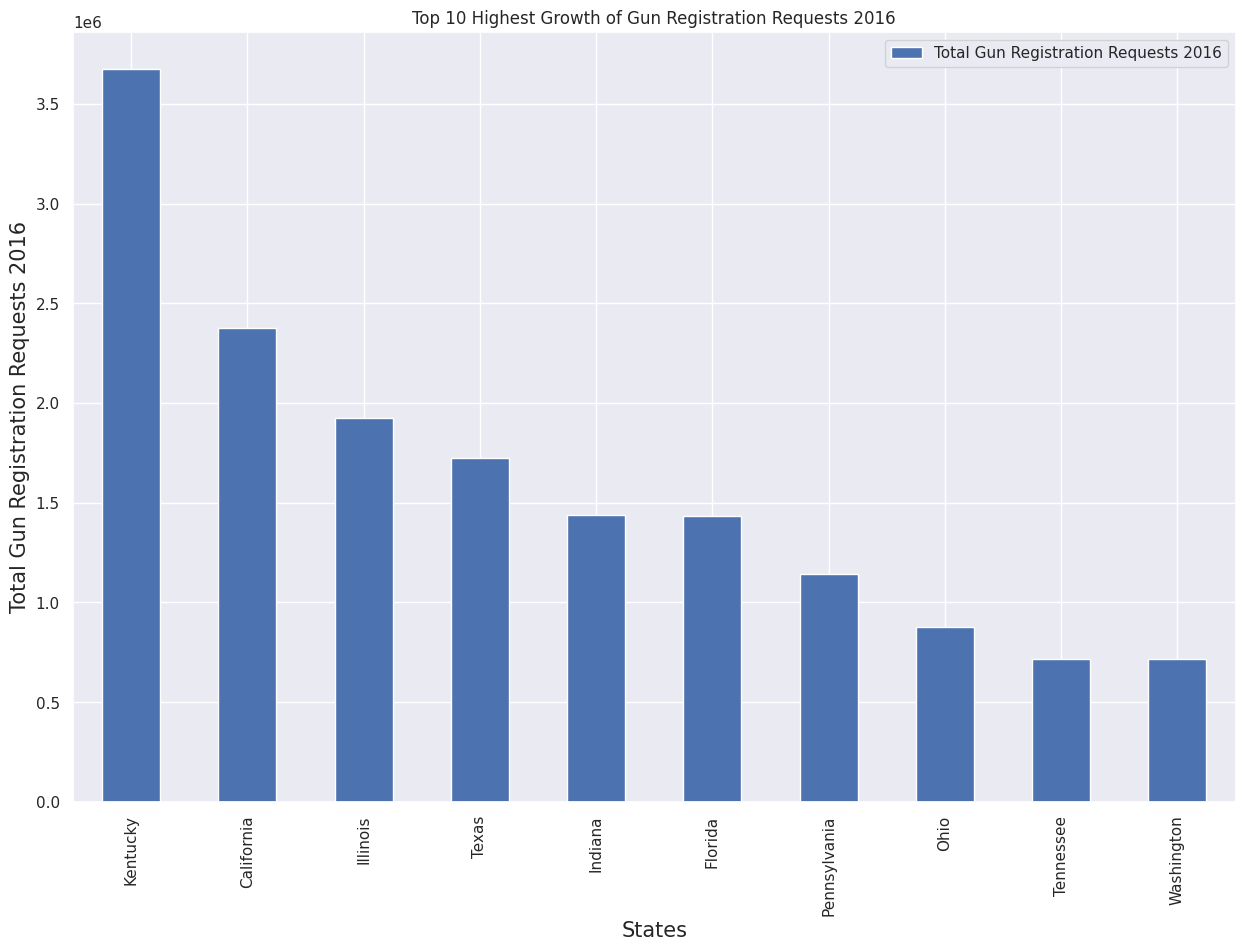

In [33]:
sns.set()
df_question_2.plot(x='state', y='totals', kind = 'bar', figsize=(15, 10))
plt.xlabel('States', fontsize = 15)
plt.ylabel('Total Gun Registration Requests 2016', fontsize = 15)
plt.title('Top 10 Highest Growth of Gun Registration Requests 2016')
plt.legend(['Total Gun Registration Requests 2016'])

**Top 10 Highest Growth of Gun Registration Requests 2016** provide the fast view about the states with **high require of Gun Puchases**.

### Research Question 3  : What is the overall trend of gun purchases ?

In [34]:
# calculate total guns by year
df_question_3 = df_gun_clean.groupby('year_int')['totals'].sum().reset_index()
df_question_3.head()

,year_int,totals
0,1998,891898
1,1999,9043747
2,2000,8427096
3,2001,8820045
4,2002,8367069


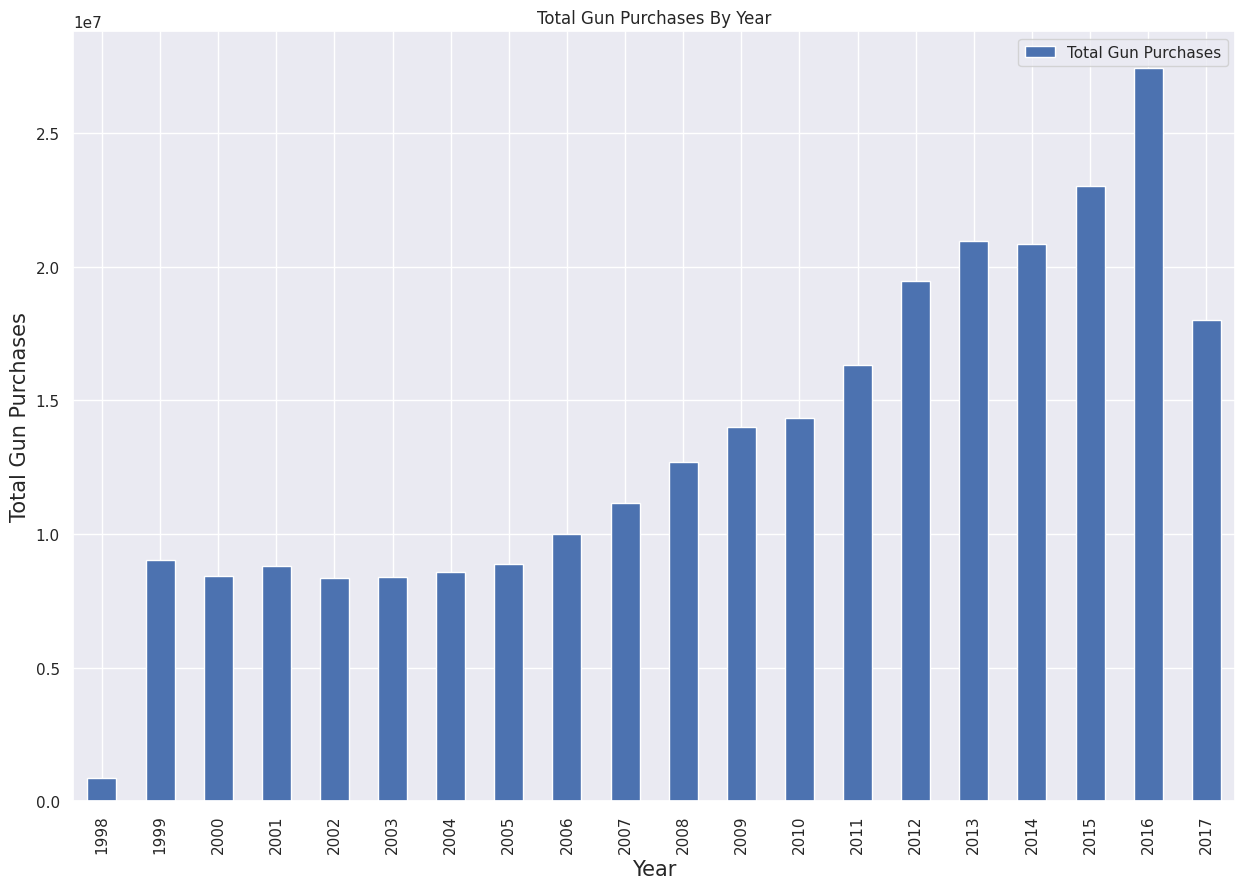

In [35]:
sns.set()
df_question_3.plot(x='year_int', y='totals', kind = 'bar', figsize=(15, 10))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total Gun Purchases', fontsize = 15)
plt.title('Total Gun Purchases By Year')
plt.legend(['Total Gun Purchases'])

Although **Total GB check requests** not exactly actual gun sales. However, this data could use for alternatively for explain the trend of Gun Purchase Requirements by year 1998 to 2017 that describe by **Total Gun Purchases By Year** chart.

<a id='conclusions'></a>
## Conclusions

### Questions to investigate

#### Research Question 1: What census data is most associated with high gun per capita ?
> The Facts of census have a loose coupling with high gun per capita. In the analyticed facts, only "White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)" fact that have strongly association with "high gun per capita" with positve association.
#### Research Question 2  : Which Top 10 states have had the highest growth in gun registrations in 2016 ?
> In top 10 of highest. Kentucky state have highest number of registration and nearly more 5 times than Washington 
#### Research Question 3  : What is the overall trend of gun purchases ?
> The time span from 1998 to 2017
    > - 1998 - 1999: rocket raissing
    > - 1999 - 2005: stablely
    > - 2005 - 2016: strongly increasing
    > - 1026 - 2017: suddenly decreasing  
### Limitations :
 1. The Cencus data mostly for 2016, dataset should be better with fully data by each year.
 2. Data with NAN values and value flags (F, FN, NA, Z) that will affect to some variables accuracy.
 3. The background check requests count that not actual gun sales. So need some addtional methods to convert BG checks into estimated sales.

In [39]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1567159 bytes to Investigate_a_Dataset.html
